<a href="https://colab.research.google.com/github/arpitp1234/machinelearning/blob/main/cat_vs_Dog_prediction_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#First two cell command how bring kaggle data from kaggle server to collab server
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [6]:
!kaggle datasets download -d haroon669/cats-vs-dogs-dataset-10k-cat-10k-dog-images

Dataset URL: https://www.kaggle.com/datasets/haroon669/cats-vs-dogs-dataset-10k-cat-10k-dog-images
License(s): CC0-1.0
100% 1.06G/1.06G [00:39<00:00, 32.6MB/s]
100% 1.06G/1.06G [00:39<00:00, 29.0MB/s]


In [10]:
import zipfile
zip_ref=zipfile.ZipFile('/content/cats-vs-dogs-dataset-10k-cat-10k-dog-images.zip','r')
zip_ref.extractall('/content')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/cats-vs-dogs-dataset-10k-cat-10k-dog-images.zip' mode='r'>>

In [26]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [27]:
#generator -"It divides whole data into batches"
#generator are very useful to process very large amount of data
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',          #label_mode will do 1 for cat and dog
    batch_size=32,
    image_size=(256,256)     #image are differnt size so all images same size

)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',          #label_mode will do 1 for cat and dog
    batch_size=32,
    image_size=(256,256)     #image are differnt size so all images same size
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [28]:
#all files are stored in numpy array and value of numpy is 0-256 and we have to take_down to 0-1
#So we will not normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


In [33]:
#create CNN model  #kernel_size refer to filter_size
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

#Then three activation function,128  is neuron
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [35]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)    #each_epochs_was_taking _so_much_time_so_I_hav take only 2 epochs

Epoch 1/10
625/625 [==============================] - 72s 107ms/step - loss: 1.0822 - accuracy: 0.5975 - val_loss: 0.6533 - val_accuracy: 0.6206
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5658 - accuracy: 0.7094 - val_loss: 0.5186 - val_accuracy: 0.7520
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4704 - accuracy: 0.7789 - val_loss: 0.4525 - val_accuracy: 0.8030
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4008 - accuracy: 0.8209 - val_loss: 0.4210 - val_accuracy: 0.8136
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3341 - accuracy: 0.8526 - val_loss: 0.5755 - val_accuracy: 0.7348
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2685 - accuracy: 0.8880 - val_loss: 0.6465 - val_accuracy: 0.7470
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1816 - accuracy: 0.9284 - val_loss: 0.4783 - val_ac

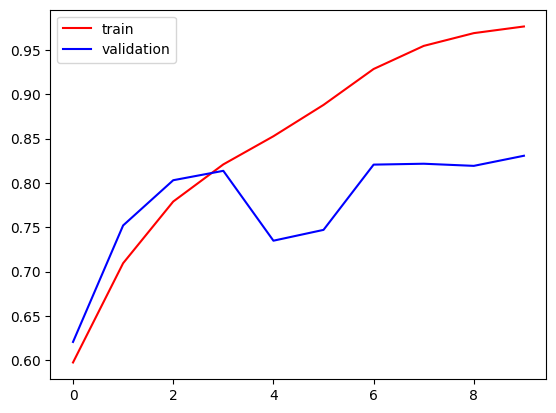

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [38]:
#if there is more gap between two lines it means there is overfitting

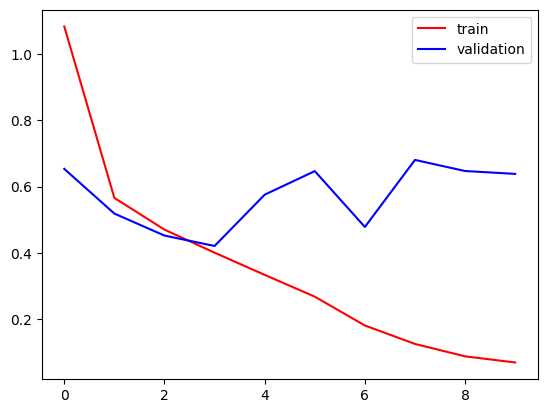

In [39]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [40]:
#Previously without using BatchNormalisation and Dropout there more gap between lines which shows there is overfitting,so to reduce that we have used Batch Normalization and dropout which has reduce the gap

In [41]:
#ways to reduce overfitting

#1.Add more data
#2.Data Augmentation=>In this we create more data using existing data
#3.L1/L2 regularization
#4.Dropout
#5.Batch Normalization
#6.Reduce Complexity of model

In [42]:
#here we will use dropout and batch normalization to reduce overfitting
#to add BatchNormalization and dropout we will go above where we have import other thing and import
#We will use BatchNormalization and dropout in the model.

In [43]:
import cv2

In [65]:
test_img=cv2.imread('/content/dog1.jpg')

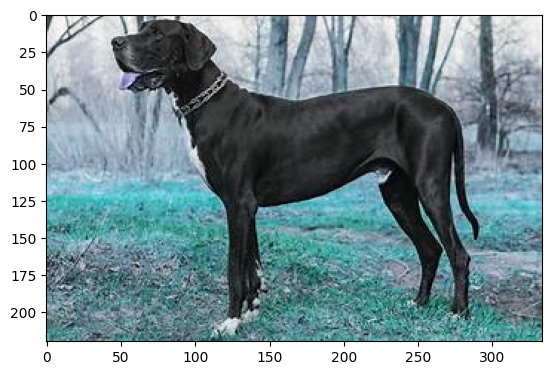

In [66]:
plt.imshow(test_img)

In [67]:
test_img.shape

(220, 334, 3)

In [68]:
test_img=cv2.resize(test_img,(256,256))

In [69]:
test_input=test_img.reshape(1,256,256,3)
#1 means there is only 1 image

In [70]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[2.0969296e-31]], dtype=float32)